AUTHOR: Mohamed Sohail Rajab

### A reference to the data set source:<br>
Twitter and Reddit Sentimental analysis Dataset<br>
CHAITHANYA KUMAR<br>
https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset?datasetId=429085&sortBy=voteCount<br>


### What is a Recurrent Neural Network (RNN) ? 
A Recurrent Neural Network (RNN) is a form of artificial neural network that is designed to process sequential data while remembering prior inputs. RNNs include connections that loop back on themselves, allowing them to manage sequences of variable lengths and capture temporal relationships in the input. This differs from feedforward neural networks, which process data in a fixed and one-directional fashion.
The concept of hidden states or memory cells is central to RNNs. An RNN accepts an input (e.g., a word in a phrase) and changes its hidden state depending on this input and its prior hidden state at each time step. This permits RNNs to keep track of the whole sequence they've observed so far. The hidden state is impacted not just by the current input but also by all prior inputs in the sequence at each time step.
RNNs are widely employed in natural language processing, time series analysis, speech recognition, and a variety of other applications using sequential data. Traditional RNNs, on the other hand, suffer from the "vanishing gradient" problem, which restricts their capacity to detect long-range relationships in sequences. To address this issue, more advanced RNN variants have been developed, such as Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU), which have mechanisms to better control the flow of information and gradients through the network, making them more effective for modelling sequential data. (Laskowski and TechTarget Contributor, 2021)<br>


### An explanation of why the data set is appropriate for processing using a recurrent neural network:
The chosen dataset is an appropriate choice for Natural Language Processing using a Recurrent Neural Network for several reasons:
Sequential Data: RNNs are built to deal with sequential data, such as text, time series, or voice. Each row of your dataset represents a user's remark, which is a series of words in your example. RNNs can capture the sequential aspect of language by considering the sequence of words in a phrase, which is important for sentiment analysis because the sentiment of a statement frequently depends on how the words are arranged.
Temporal Dependencies: Sentiment analysis frequently entails analysing the sentiment of a statement in the context of prior words or sentences. Hidden states in RNNs can capture temporal dependencies, allowing them to remember and incorporate prior words when predicting the mood of the present word or sentence.
Variable-Length Sequences: RNNs can deal with variable-length sequences. Comment length can vary greatly in social media sites such as Twitter and Reddit. RNNs can handle these remarks without requiring fixed-length input, as some other machine learning models require.
Word Embeddings: RNNs may be used with pre-trained word embeddings (Avikumar Talaviya, 2022) such as Word2Vec, GloVe, or FastText. These embeddings allow for the representation of words in a continuous vector space while also capturing semantic links between words. In the context of sentiment analysis, this helps RNNs grasp the meaning of words.
Model Complexity: While simple RNNs are adequate for basic sentiment analysis tasks, more complicated RNN variations such as Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) can capture longer-term relationships and avoid the vanishing gradient problem. These versions are especially useful for comprehending the context of sentiment in lengthier phrases (Thakur, 2023).
Contextual Information: Context from earlier comments or debates is frequently included in social media remarks. RNNs can represent such contextual information, which can be critical for interpreting the mood of a comment in the context of a wider discourse.
Multi-Class Classification: RNNs can manage multi-class sentiment classification since, as you indicated, you have three sentiment labels (-1, 0, 1). Softmax activation in the output layer can be used to forecast one of these three groups.
Fine-Tuning and Transfer Learning: On your sentiment analysis task, you may fine-tune pre-trained RNN models (e.g., LSTM or GRU). Transfer learning from models that have been pretrained on a large corpus of text data (e.g., GPT-3 or BERT) is also possible, which can increase model performance when labelled data is restricted.
RNNs are appropriate for sentiment analysis on datasets such as "twitter.csv" and "reddit.csv" because of their capacity to manage sequential, variable-length text data, capture temporal relationships, and comprehend contextual subtleties in social media comments. However, you should consider more recent advances in natural language processing (NLP), such as transformer-based models, which have demonstrated exceptional performance in a variety of NLP applications, including sentiment analysis.<br>

### Outline and explanation of the processes of analysis caried out in this notebook:

1. Exploratory Analysis and Data Wrangling:
The dataset is loaded and combined from Twitter and Reddit data sources.
Basic data exploration is conducted to understand the dataset's structure and content.
The distribution of sentiment categories (Negative, Neutral, Positive) is visualized to assess class balance.
Word clouds are generated for each sentiment category to identify common words associated with each sentiment.
2. Information Conveyed by Tables and Graphs:
The tables and graphs in the exploratory analysis provide insights into the distribution of sentiment categories and the most common words associated with each sentiment.
Summary statistics of the "category" column convey the count of each sentiment category.
The bar plots illustrate the distribution of sentiment categories.
Word clouds visually represent the most frequent words for each sentiment category.
3. Hyperparameter Tuning (for Machine Learning Models):
The code defines and trains multiple machine learning models (Logistic Regression, Naive Bayes, Decision Tree, Random Forest) to predict sentiment.
For hyperparameter tuning, it uses techniques like Cross-Validation and grid search to find the best combination of hyperparameters for each model.
4. Interpretation of Model Results:
The code evaluates the machine learning models using metrics like accuracy, precision, recall, and F1-score.
The results are interpreted by examining false positive rate, true positive rate, precision, recall, and F-measure on a per-label basis.
The effects of hyperparameter tuning on model performance are analysed.
5. Model Evaluation and Improvement:
The performance of machine learning models is assessed using various metrics.
The models are fine-tuned to optimize their performance.
Potential improvements may involve exploring different feature engineering techniques, trying more complex models, or collecting additional data.
6. LSTM and RNN using TensorFlow:
The code demonstrates the use of deep learning models (Bidirectional LSTM) to predict sentiment.
Text preprocessing steps, including tokenization and padding, are applied.
Model accuracy and loss are evaluated and visualized.
A confusion matrix is generated to assess model performance.
7. Future Methods:
The code includes saving and loading a trained deep learning model for future use.
A function for predicting sentiment from new text data is provided.<br>
This analysis aims to understand and predict sentiment in text data from social media sources, providing valuable insights into public opinion and potential business applications. To further enhance the analysis, more advanced natural language processing techniques, such as pre-trained word embeddings (e.g., Word2Vec, GloVe), could be explored, and the deep learning models could be fine-tuned for better performance. Additionally, sentiment analysis could be extended to analyse sentiment trends over time or across different topics.<br>


In [205]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer, StopWordsRemover, CountVectorizer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan, isnull
from pyspark.ml.feature import StopWordsRemover, Tokenizer
from pyspark.ml.feature import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pandas as pd 
import os
import tweepy as tw 
from pyspark.sql.functions import explode
from wordcloud import WordCloud
from pyspark.sql.functions import col, collect_list
from wordcloud import WordCloud
import plotly.express as px
from pyspark.sql.functions import col

## Exploratory Data Analysis (EDA) Using PySpark ❇️

In [206]:
# Mygreatlearning.com. (2023). Great Learning. 
# [online] Available at: https://olympus.mygreatlearning.com/courses/31729/pages/pyspark-hands-on?module_item_id=879874 [Accessed 20 Sep. 2023].
# Initialize Spark session
spark = SparkSession.builder.appName("SentimentAnalysisEDA").getOrCreate()

In [207]:
# Load Twitter dataset
twitter_data = spark.read.csv("Twitter_Data.csv", header=True, inferSchema=True)

In [208]:
# Load Reddit dataset
reddit_data = spark.read.csv("Reddit_Data.csv", header=True, inferSchema=True)

In [209]:
# Combine the datasets
combined_data = twitter_data.union(reddit_data)

The coulumn labelled "category" has 3 values:<br>
0 Indicating a Neutral Sentiment <br>
1 Indicating a Postive Sentiment <br>
-1 Indicating a Negative Sentiment <br>

In [210]:
data = combined_data.na.drop(how='any')
data.show(5)

+--------------------+--------+
|          clean_text|category|
+--------------------+--------+
|when modi promise...|      -1|
|talk all the nons...|       0|
|what did just say...|       1|
|asking his suppor...|       1|
|answer who among ...|       1|
+--------------------+--------+
only showing top 5 rows



In [211]:
# Basic Data Exploration
# Summary statistics of "category" column
data.describe("category").show()

+-------+-------------------+
|summary|           category|
+-------+-------------------+
|  count|             195578|
|   mean|0.22147685322480035|
| stddev|  0.781798848740376|
|    min|                 -1|
|    max|                  1|
+-------+-------------------+



In [212]:
data.count() 

195578

In [213]:
data.printSchema()

root
 |-- clean_text: string (nullable = true)
 |-- category: integer (nullable = true)



In [214]:
data.groupBy("category").count().orderBy(col("count").desc()).show()

+--------+-----+
|category|count|
+--------+-----+
|       1|86224|
|       0|66446|
|      -1|42908|
+--------+-----+



Model Pipeline

In [215]:
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer
from pyspark.ml.classification import LogisticRegression
regexTokenizer = RegexTokenizer(inputCol="clean_text", outputCol="words", pattern="\\W")
# stop words
add_stopwords = ["http","https","amp","rt","t","c","the"] 
stopwordsRemover = StopWordsRemover(inputCol="words", outputCol="filtered").setStopWords(add_stopwords)
# bag of words count
countVectors = CountVectorizer(inputCol="filtered", outputCol="features", vocabSize=30000, minDF=5)

In [216]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
label_stringIdx = StringIndexer(inputCol = "category", outputCol = "label")
pipeline = Pipeline(stages=[regexTokenizer, stopwordsRemover, countVectors, label_stringIdx])
# Fit the pipeline to training documents.
pipelineFit = pipeline.fit(data)
dataset = pipelineFit.transform(data)
dataset.show(5)

+--------------------+--------+--------------------+--------------------+--------------------+-----+
|          clean_text|category|               words|            filtered|            features|label|
+--------------------+--------+--------------------+--------------------+--------------------+-----+
|when modi promise...|      -1|[when, modi, prom...|[when, modi, prom...|(24654,[0,1,7,30,...|  2.0|
|talk all the nons...|       0|[talk, all, the, ...|[talk, all, nonse...|(24654,[0,1,2,8,1...|  1.0|
|what did just say...|       1|[what, did, just,...|[what, did, just,...|(24654,[0,2,3,20,...|  0.0|
|asking his suppor...|       1|[asking, his, sup...|[asking, his, sup...|(24654,[0,6,7,8,1...|  0.0|
|answer who among ...|       1|[answer, who, amo...|[answer, who, amo...|(24654,[0,22,69,1...|  0.0|
+--------------------+--------+--------------------+--------------------+--------------------+-----+
only showing top 5 rows



Bargraph showing how many Tweets/Reddits occur per sentiment 

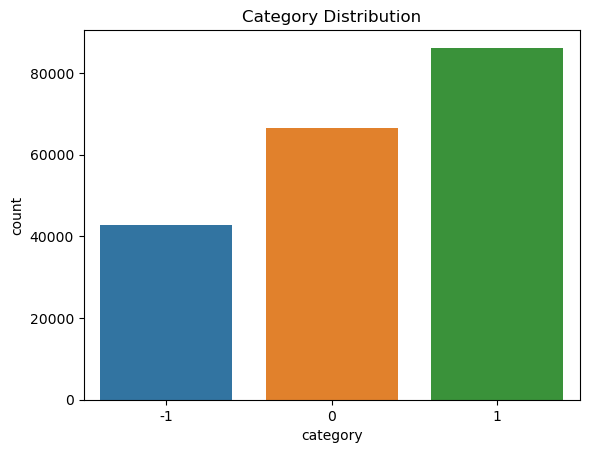

In [217]:
# Distribution of Categories
category_distribution = dataset.groupBy("category").count().toPandas()
sns.barplot(x="category", y="count", data=category_distribution)
plt.title("Category Distribution")
plt.show()

Worcloud indication the most used words from each sentiment, the larger the text in the graph, the more the word has been used

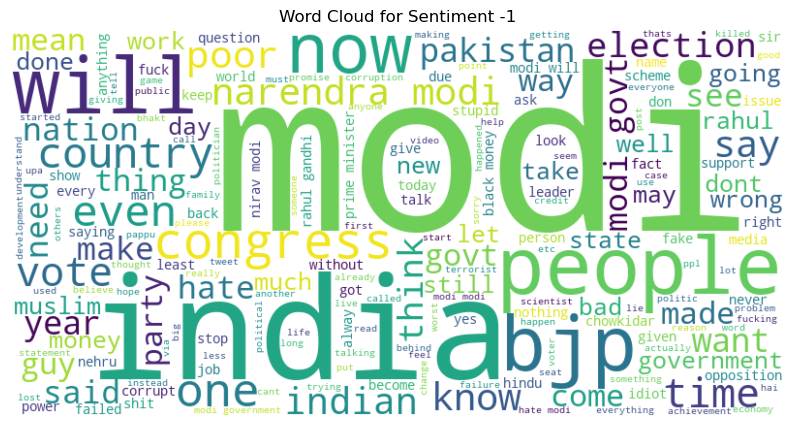

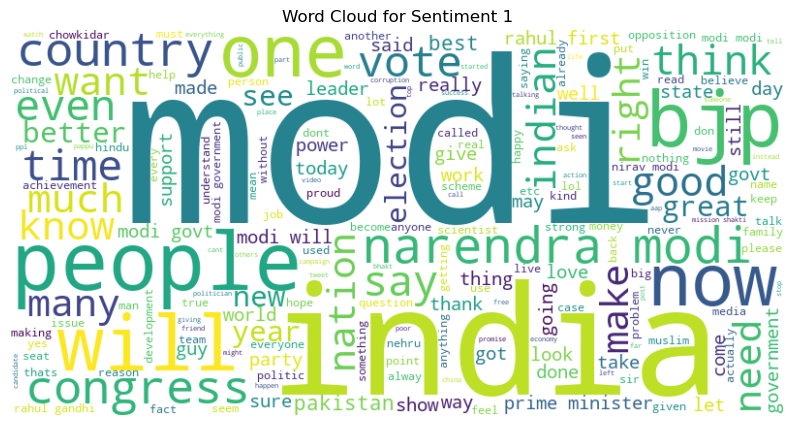

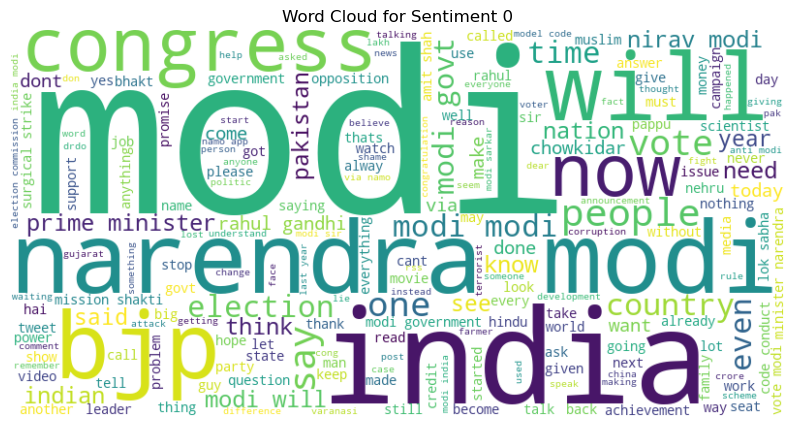

In [218]:
# Samiksha (2021). Use WordCloud on column of words python. [online] Stack Overflow. 
# Available at: https://stackoverflow.com/questions/66834810/use-wordcloud-on-column-of-words-python [Accessed 20 Sep. 2023].
word_lists_by_sentiment = dataset.groupBy("category").agg(collect_list("clean_text").alias("words_list"))
word_lists_by_sentiment_pandas = word_lists_by_sentiment.toPandas()
for index, row in word_lists_by_sentiment_pandas.iterrows():
    sentiment = row["category"]
    words = " ".join(row["words_list"])

    # Create WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(words)

    # Display the WordCloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for Sentiment {sentiment}")
    plt.axis("off")
    plt.show()


Bar Graph showing how many times the top 10 most used word occurs

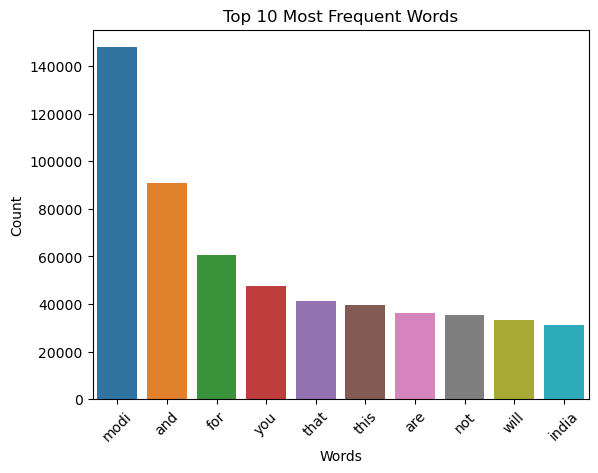

In [219]:
# Pythontic.com. (2018). Bar chart using pandas DataFrame in Python | Pythontic.com.
# [online] Available at: https://pythontic.com/pandas/dataframe-plotting/bar%20chart#:~:text=Plotting%20Bar%20charts%20using%20pandas%20DataFrame%3A&text=The%20bar()%20method%20draws,columns%20are%20drawn%20as%20Y. [Accessed 20 Sep. 2023].
word_count_df = dataset.select(explode("filtered").alias("words")).groupBy("words").count()
word_count_df = word_count_df.orderBy("count", ascending=False)
word_count_pandas = word_count_df.limit(10).toPandas()

sns.barplot(x="words", y="count", data=word_count_pandas)
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [220]:
# set seed for reproducibility
(trainingData, testData) = dataset.randomSplit([0.7, 0.3], seed = 100)
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 136742
Test Dataset Count: 58836


In [221]:
lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)
lrModel = lr.fit(trainingData)

predictions = lrModel.transform(testData)

predictions.filter(predictions['prediction'] == 0).select("clean_text","category","probability","label","prediction")\
.orderBy("probability", ascending=False).show(n = 10, truncate = 30)

+------------------------------+--------+------------------------------+-----+----------+
|                    clean_text|category|                   probability|label|prediction|
+------------------------------+--------+------------------------------+-----+----------+
|part you have something min...|       1|[1.0,9.77631392200901E-46,5...|  0.0|       0.0|
|even though iit and iim stu...|       1|[1.0,1.1625365806358665E-47...|  0.0|       0.0|
| what your opinion about so...|       1|[0.9999999999995639,4.19716...|  0.0|       0.0|
|she right she right she rig...|       1|[0.9999999999970124,4.54714...|  0.0|       0.0|
| 2002 narendra modi the cur...|       1|[0.9999999999903655,1.47477...|  0.0|       0.0|
| chennai super kings for th...|       1|[0.9999999999814224,3.28327...|  0.0|       0.0|
|ist aht teh chikcf rom retr...|       1|[0.9999999925389519,9.00234...|  0.0|       0.0|
|upa had one the highest gro...|       1|[0.9999999839171612,7.22355...|  0.0|       0.0|
|svt 1989 

In [222]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
lrAccuracy = evaluator.evaluate(predictions)
print(lrAccuracy)

0.7706588617183189


In [223]:
# ROC, E. (2023). Extracting ROC Curve with PySpark: A Comprehensive Guide | Saturn Cloud Blog. [online] Saturncloud.io. <br>
#  Available at: https://saturncloud.io/blog/extracting-roc-curve-with-pyspark-a-comprehensive-guide/ [Accessed 20 Sep. 2023].
trainingSummary = lrModel.summary

print("\nFalse positive rate by label:")
for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("\nTrue positive rate by label:")
for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("\nPrecision by label:")
for i, prec in enumerate(trainingSummary.precisionByLabel):
    print("label %d: %s" % (i, prec))

print("\nRecall by label:")
for i, rec in enumerate(trainingSummary.recallByLabel):
    print("label %d: %s" % (i, rec))

print("\nF-measure by label:")
for i, f in enumerate(trainingSummary.fMeasureByLabel()):
    print("label %d: %s" % (i, f))

accuracy = trainingSummary.accuracy
falsePositiveRate = trainingSummary.weightedFalsePositiveRate
truePositiveRate = trainingSummary.weightedTruePositiveRate
fMeasure = trainingSummary.weightedFMeasure()
precision = trainingSummary.weightedPrecision
recall = trainingSummary.weightedRecall
print("\nAccuracy: %s\n\nFPR: %s\n\nTPR: %s\n\nF-measure: %s\n\nPrecision: %s\n\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))


False positive rate by label:
label 0: 0.0934044388675398
label 1: 0.12375251709411166
label 2: 0.007458065968704267

True positive rate by label:
label 0: 0.9046749452154857
label 1: 0.946160483175151
label 2: 0.6388243879785046

Precision by label:
label 0: 0.8840687865022713
label 1: 0.7968173808788533
label 2: 0.9603550590934025

Recall by label:
label 0: 0.9046749452154857
label 1: 0.946160483175151
label 2: 0.6388243879785046

F-measure by label:
label 0: 0.8942531753585612
label 1: 0.8650908696466783
label 2: 0.767266280204785

Accuracy: 0.8601307571923769

FPR: 0.0847457791227326

TPR: 0.8601307571923769

F-measure: 0.8563708024657511

Precision: 0.8713057057284825

Recall: 0.8601307571923769


Logistic Regression using TF-IDF Features

In [224]:
# Apache.org. (2023). Extracting, transforming and selecting features - spark.ml - Spark 1.6.1 Documentation. 
# [online] Available at: https://spark.apache.org/docs/1.6.1/ml-features.html [Accessed 20 Sep. 2023].
from pyspark.ml.feature import HashingTF, IDF
hashingTF = HashingTF(inputCol="filtered", outputCol="rawFeatures", numFeatures=30000)
idf = IDF(inputCol="rawFeatures", outputCol="features", minDocFreq=5) #minDocFreq: remove sparse terms
pipeline = Pipeline(stages=[regexTokenizer, stopwordsRemover, hashingTF, idf, label_stringIdx])

pipelineFit = pipeline.fit(data)
dataset = pipelineFit.transform(data)

(trainingData, testData) = dataset.randomSplit([0.7, 0.3], seed = 100)
lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)
lrModel = lr.fit(trainingData)

predictions = lrModel.transform(testData)

predictions.filter(predictions['prediction'] == 0) \
    .select("clean_text","category","probability","label","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

+------------------------------+--------+------------------------------+-----+----------+
|                    clean_text|category|                   probability|label|prediction|
+------------------------------+--------+------------------------------+-----+----------+
|part you have something min...|       1|[0.9999999999999978,8.00813...|  0.0|       0.0|
|even though iit and iim stu...|       1|[0.9999999999999871,3.72158...|  0.0|       0.0|
| what your opinion about so...|       1|[0.9999999999992681,1.11682...|  0.0|       0.0|
|she right she right she rig...|       1|[0.9999999999968667,4.01727...|  0.0|       0.0|
| 2002 narendra modi the cur...|       1|[0.9999999999350917,3.78642...|  0.0|       0.0|
|upa had one the highest gro...|       1|[0.9999999987477581,2.07874...|  0.0|       0.0|
|thanks for doing this ama t...|       1|[0.9999999729296293,1.95190...|  0.0|       0.0|
|this the first time was gre...|       1|[0.9999999344994687,2.21122...|  0.0|       0.0|
|ist aht t

In [225]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
evaluator.evaluate(predictions)

0.743005205397842

In [226]:
# Li, S. (2018). Multi-Class Text Classification with PySpark - Towards Data Science. 
# [online] Medium. Available at: https://towardsdatascience.com/multi-class-text-classification-with-pyspark-7d78d022ed35 [Accessed 20 Sep. 2023].
pipeline = Pipeline(stages=[regexTokenizer, stopwordsRemover, countVectors, label_stringIdx])

pipelineFit = pipeline.fit(data)
dataset = pipelineFit.transform(data)
(trainingData, testData) = dataset.randomSplit([0.7, 0.3], seed = 100)

lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)

Cross-Validation

In [227]:
# Apache.org. (2023). ML Tuning - Spark 3.5.0 Documentation. 
# [online] Available at: https://spark.apache.org/docs/latest/ml-tuning.html [Accessed 20 Sep. 2023].
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.1, 0.3, 0.5]) 
             .addGrid(lr.elasticNetParam, [0.0, 0.1, 0.2]) 

             .build())


cv = CrossValidator(estimator=lr, \
                    estimatorParamMaps=paramGrid, \
                    evaluator=evaluator, \
                    numFolds=5)

cvModel = cv.fit(trainingData)
predictions = cvModel.transform(testData)
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
evaluator.evaluate(predictions)


0.8266595436822157

Naive Bayes

In [228]:
from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes(smoothing=1)
nbModel = nb.fit(trainingData)
predictions = nbModel.transform(testData)
predictions.filter(predictions['prediction'] == 0) \
    .select("clean_text","category","probability","label","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

+------------------------------+--------+------------------------------+-----+----------+
|                    clean_text|category|                   probability|label|prediction|
+------------------------------+--------+------------------------------+-----+----------+
|respected sir sar and madam...|       1|[1.0,7.308939495977858E-18,...|  0.0|       0.0|
| team strengths retained co...|       1|[1.0,1.2380549341069472E-18...|  0.0|       0.0|
|respected sir sar and madam...|       1|[1.0,2.0607743285077304E-19...|  0.0|       0.0|
|respected sir sar and madam...|       1|[1.0,1.2877618878208888E-21...|  0.0|       0.0|
|respected sir sar and madam...|       1|[1.0,9.280454666117545E-22,...|  0.0|       0.0|
|respected sir sar and madam...|       1|[1.0,2.0018099334290323E-22...|  0.0|       0.0|
|erosnow com has good actor ...|       1|[1.0,9.177524435135607E-23,...|  0.0|       0.0|
|respected sar ayam subash s...|       1|[1.0,9.08439754684448E-23,1...|  0.0|       0.0|
| don thin

In [229]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
nbAccuracy = evaluator.evaluate(predictions)
print(nbAccuracy)

0.764224901722392


DecisionTreeClassifier

In [230]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(trainingData)
predictions = dtModel.transform(testData)
predictions.filter(predictions['prediction'] == 0) \
    .select("clean_text","category","probability","label","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

+------------------------------+--------+------------------------------+-----+----------+
|                    clean_text|category|                   probability|label|prediction|
+------------------------------+--------+------------------------------+-----+----------+
| bache log kab sudharenge h...|       1|[0.9040262941659819,0.01511...|  0.0|       0.0|
| jawahar lal nehru was the ...|       1|[0.9040262941659819,0.01511...|  0.0|       0.0|
| pappu fooling the poor peo...|       1|[0.9040262941659819,0.01511...|  0.0|       0.0|
|after modi came nepal more ...|       1|[0.9040262941659819,0.01511...|  0.0|       0.0|
| more than can handle she  ...|       1|[0.9040262941659819,0.01511...|  0.0|       0.0|
| narendra modi wave much mo...|       1|[0.9040262941659819,0.01511...|  0.0|       0.0|
|all congressi leaders top m...|       1|[0.9040262941659819,0.01511...|  0.0|       0.0|
|125 crore families india ga...|       1|[0.9040262941659819,0.01511...|  0.0|       0.0|
| imran kh

In [231]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
dtAccuracy = evaluator.evaluate(predictions)
print(dtAccuracy) 

0.2719464740349054


Random Forest

In [232]:
rf = RandomForestClassifier(labelCol="label", \
                            featuresCol="features", \
                            numTrees = 100, \
                            maxDepth = 4, \
                            maxBins = 32)

rfModel = rf.fit(trainingData)
predictions = rfModel.transform(testData)
predictions.filter(predictions['prediction'] == 0) \
    .select("clean_text","category","probability","label","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

+------------------------------+--------+------------------------------+-----+----------+
|                    clean_text|category|                   probability|label|prediction|
+------------------------------+--------+------------------------------+-----+----------+
|even though iit and iim stu...|       1|[0.6205692720883333,0.15724...|  0.0|       0.0|
|part you have something min...|       1|[0.6202675956820634,0.14534...|  0.0|       0.0|
| what your opinion about so...|       1|[0.605443119581605,0.131381...|  0.0|       0.0|
| 2002 narendra modi the cur...|       1|[0.5944759338929732,0.13553...|  0.0|       0.0|
|upa was good maybe even mar...|       1|[0.5928076333606498,0.18718...|  0.0|       0.0|
| chennai super kings for th...|       1|[0.58888351606253,0.2067621...|  0.0|       0.0|
| everyone going crazy over ...|       1|[0.5883132391075478,0.18395...|  0.0|       0.0|
|upa had one the highest gro...|       1|[0.583416518698108,0.194476...|  0.0|       0.0|
| drafted 

In [233]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
rfAccuracy = evaluator.evaluate(predictions)
print(rfAccuracy) 

0.27065361002281063


In [234]:
import matplotlib.pyplot as plt
import numpy as np
model = ['Logistic regression', 'Naive Bayes', 'Random Forest']
accuracy = [lrAccuracy,nbAccuracy,rfAccuracy]


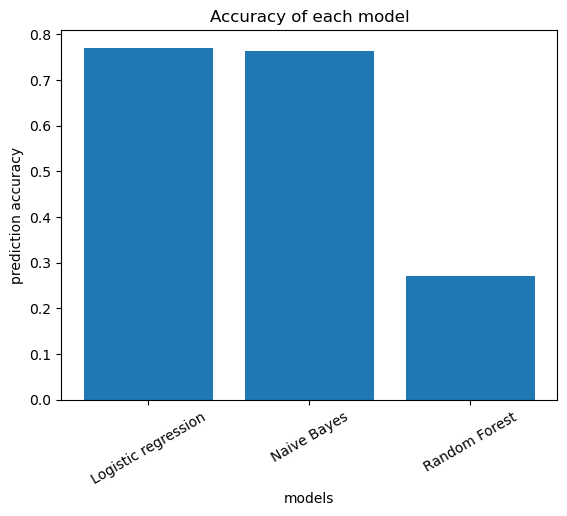

In [235]:
def plot_bar_x():
  
    index = np.arange(len(model))
    plt.bar(index, accuracy)
    plt.xlabel('models', fontsize=10)
    plt.ylabel('prediction accuracy', fontsize=10)
    plt.xticks(index, model, fontsize=10, rotation=30)
    plt.title('Accuracy of each model')
    plt.show()
    
plot_bar_x()

In [236]:
#END
# Stopping the Spark session
spark.stop()

## Further Exploratory Data Analysis (EDA) RNN | Long Short-Term Memory (LSTM) 🤖

In [237]:
twit = pd.read_csv('Twitter_Data.csv')
# Output first five rows
twit.head()

clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

In [238]:
red = pd.read_csv('Reddit_Data.csv')
red = red.rename(columns={'clean_comment': 'clean_text', 'sentiment':'category'})
red['category'] = red['category'].map({-1: -1.0, 0: 0.0, 1:1.0})

red.head()

clean_text  category
0   family mormon have never tried explain them t...       1.0
1  buddhism has very much lot compatible with chr...       1.0
2  seriously don say thing first all they won get...      -1.0
3  what you have learned yours and only yours wha...       0.0
4  for your own benefit you may want read living ...       1.0

In [239]:
#Combine twitter and reddit data
TwRed = pd.concat([twit, red], ignore_index=True) 

In [240]:
# Save the combined DataFrame to a new CSV file
TwRed.to_csv('Combined_Data.csv', index=False)

In [241]:
TwRed

clean_text  category
0       when modi promised “minimum government maximum...      -1.0
1       talk all the nonsense and continue all the dra...       0.0
2       what did just say vote for modi  welcome bjp t...       1.0
3       asking his supporters prefix chowkidar their n...       1.0
4       answer who among these the most powerful world...       1.0
...                                                   ...       ...
200224                                              jesus       0.0
200225  kya bhai pure saal chutiya banaya modi aur jab...       1.0
200226              downvote karna tha par upvote hogaya        0.0
200227                                         haha nice        1.0
200228             facebook itself now working bjp’ cell        0.0

[200229 rows x 2 columns]

In [242]:
# Check for missing data
TwRed.isnull().sum()

clean_text    104
category        7
dtype: int64

In [243]:
# drop missing rows
TwRed.dropna(axis=0, inplace=True)

In [244]:
# Check for missing data
TwRed.isnull().sum()

clean_text    0
category      0
dtype: int64

In [245]:
# shape of the data
TwRed.shape

(200118, 2)

In [246]:
TwRed['category'] = TwRed['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})
TwRed.head()

clean_text  category
0  when modi promised “minimum government maximum...  Negative
1  talk all the nonsense and continue all the dra...   Neutral
2  what did just say vote for modi  welcome bjp t...  Positive
3  asking his supporters prefix chowkidar their n...  Positive
4  answer who among these the most powerful world...  Positive

Visualization

In [247]:
# Machinelearningplus.com. (2020). Available at: https://www.machinelearningplus.com/plots/bar-plot-in-python/ [Accessed 20 Sep. 2023].
TwRed.groupby('category').count().plot(kind='bar')

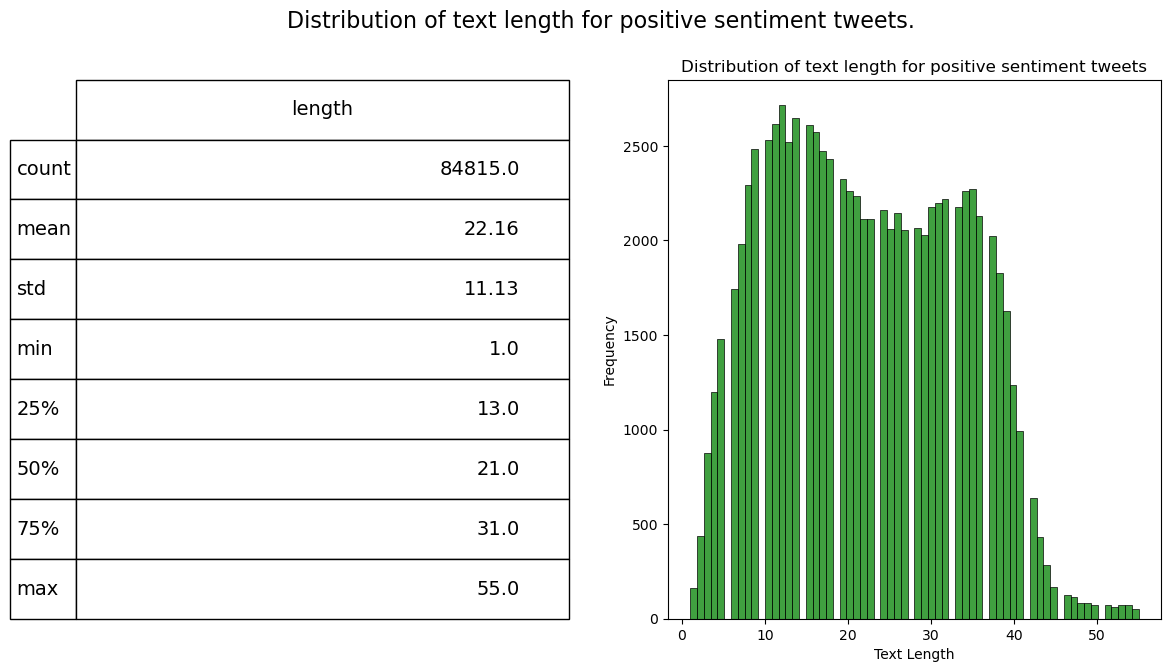

In [248]:
# Mauro Di Pietro (2020). 
# Text Analysis & Feature Engineering with NLP - Towards Data Science. [online] Medium. 
# Available at: https://towardsdatascience.com/text-analysis-feature-engineering-with-nlp-502d6ea9225d [Accessed 20 Sep. 2023].

import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(14, 7))

TwRed['length'] = TwRed.clean_text.str.split().apply(len)


positive_data = TwRed[TwRed['category'] == 'Positive']

ax1 = fig.add_subplot(122)
sns.histplot(positive_data[positive_data['length'] <= 55]['length'], ax=ax1, color='green')
ax1.set_xlabel('Text Length')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of text length for positive sentiment tweets')

# Calculate and round the statistics for the filtered data
describe = positive_data[positive_data['length'] <= 55]['length'].describe().to_frame().round(2)

# Create the table subplot (ax2)
ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]

# Limit the table to stop at 600
describe = describe[describe.index.isin(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])]

table = ax2.table(cellText=describe.values, rowLabels=describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)

# Set the main title for the figure
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

# Show the figure
plt.show()


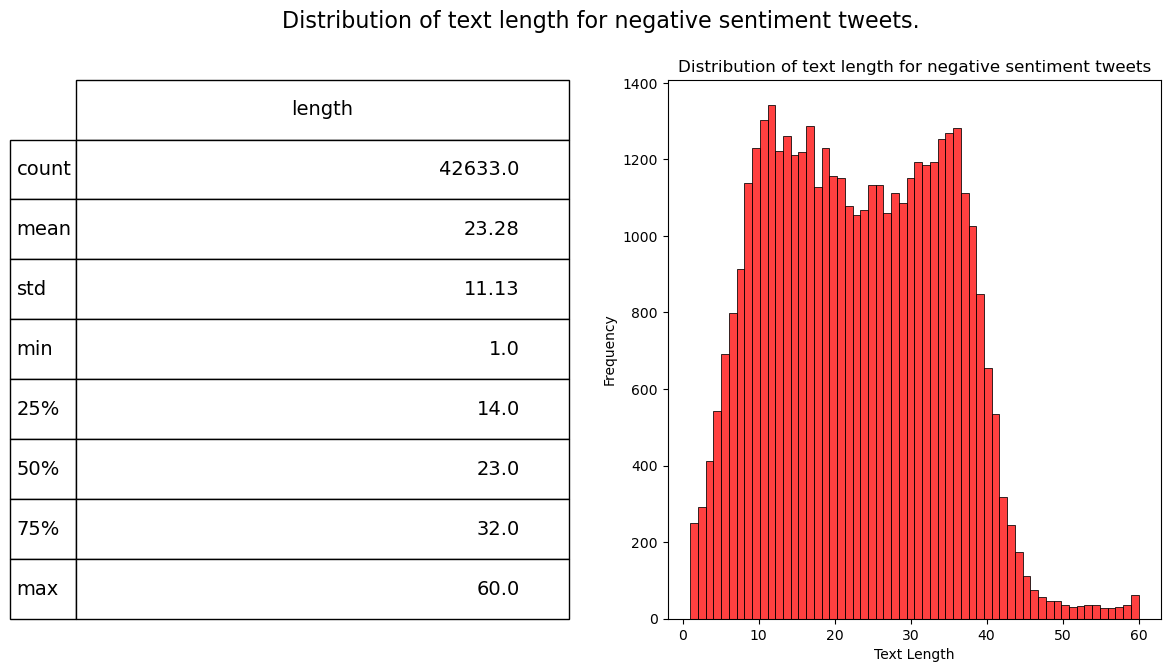

In [249]:
# Create a figure
fig = plt.figure(figsize=(14, 7))


TwRed['length'] = TwRed.clean_text.str.split().apply(len)

negative_data = TwRed[TwRed['category'] == 'Negative']

ax1 = fig.add_subplot(122)
sns.histplot(negative_data[negative_data['length'] <= 60]['length'], ax=ax1, color='red')
ax1.set_xlabel('Text Length')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of text length for negative sentiment tweets')

# Calculate and round the statistics for the filtered data
describe = negative_data[negative_data['length'] <= 60]['length'].describe().to_frame().round(2)

# Create the table subplot (ax2)
ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]

# Limit the table to stop at 60
describe = describe[describe.index.isin(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])]

table = ax2.table(cellText=describe.values, rowLabels=describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)

# Set the main title for the figure
fig.suptitle('Distribution of text length for negative sentiment tweets.', fontsize=16)

# Show the figure
plt.show()


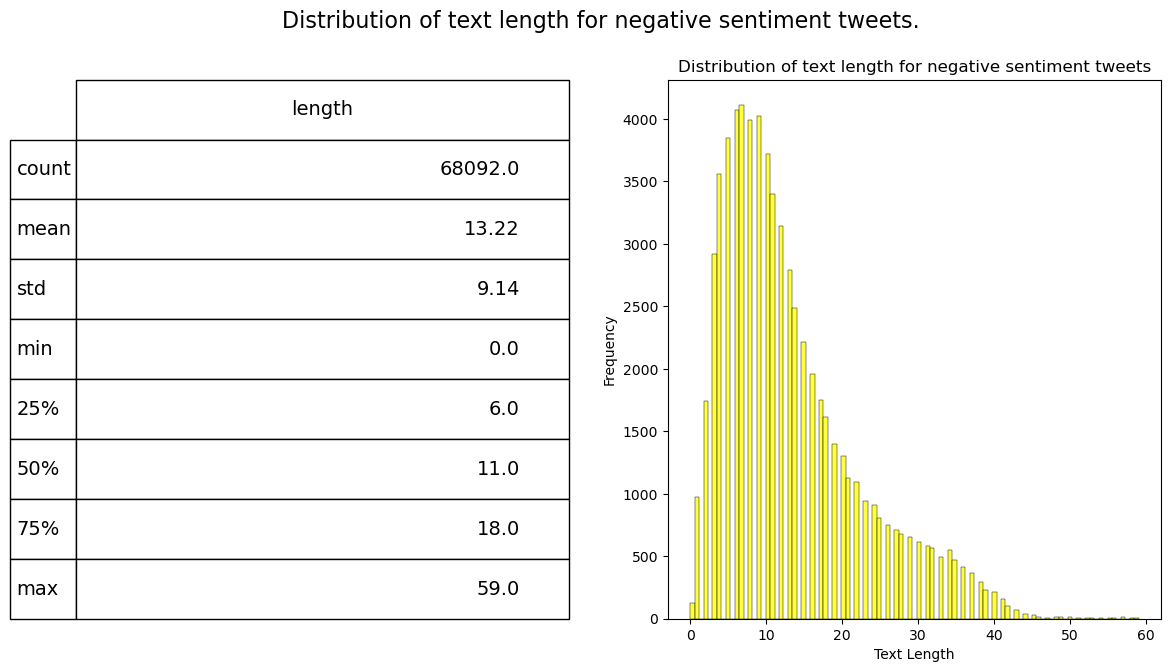

In [250]:
# Create a figure
fig = plt.figure(figsize=(14, 7))

TwRed['length'] = TwRed.clean_text.str.split().apply(len)


negative_data = TwRed[TwRed['category'] == 'Neutral']

ax1 = fig.add_subplot(122)
sns.histplot(negative_data[negative_data['length'] <= 60]['length'], ax=ax1, color='yellow')
ax1.set_xlabel('Text Length')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of text length for negative sentiment tweets')

describe = negative_data[negative_data['length'] <= 60]['length'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]

# Limit the table to stop at 60
describe = describe[describe.index.isin(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])]

table = ax2.table(cellText=describe.values, rowLabels=describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)

# Set the main title for the figure
fig.suptitle('Distribution of text length for negative sentiment tweets.', fontsize=16)

# Show the figure
plt.show()


In [251]:
# Plotly.com. (2019). Pie. [online] Available at: https://plotly.com/python/reference/pie/ [Accessed 20 Sep. 2023].
fig = px.pie(TwRed, names='category', title ='Pie Chart Showing Tweets/Reddits Sentiment Spread')
fig.show()

In [252]:
TwRed.drop(['length'], axis=1, inplace=True)
TwRed.head

<bound method NDFrame.head of                                                clean_text  category
0       when modi promised “minimum government maximum...  Negative
1       talk all the nonsense and continue all the dra...   Neutral
2       what did just say vote for modi  welcome bjp t...  Positive
3       asking his supporters prefix chowkidar their n...  Positive
4       answer who among these the most powerful world...  Positive
...                                                   ...       ...
200224                                              jesus   Neutral
200225  kya bhai pure saal chutiya banaya modi aur jab...  Positive
200226              downvote karna tha par upvote hogaya    Neutral
200227                                         haha nice   Positive
200228             facebook itself now working bjp’ cell    Neutral

[200118 rows x 2 columns]>

Worcloud indication the most used words from each sentiment, the larger the text in the graph, the more the word has been used

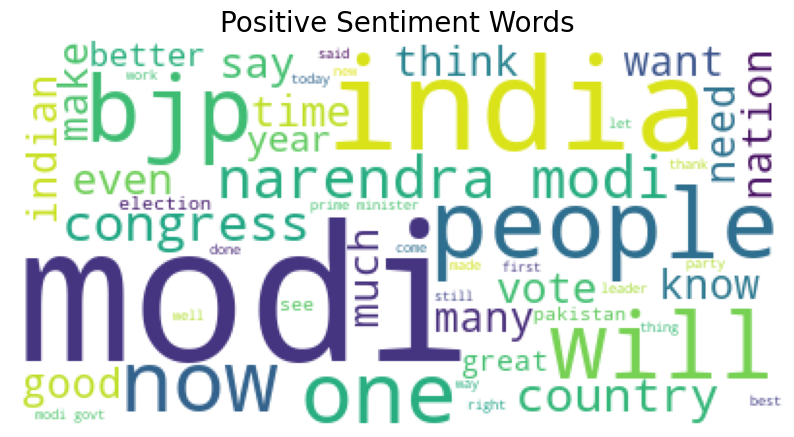

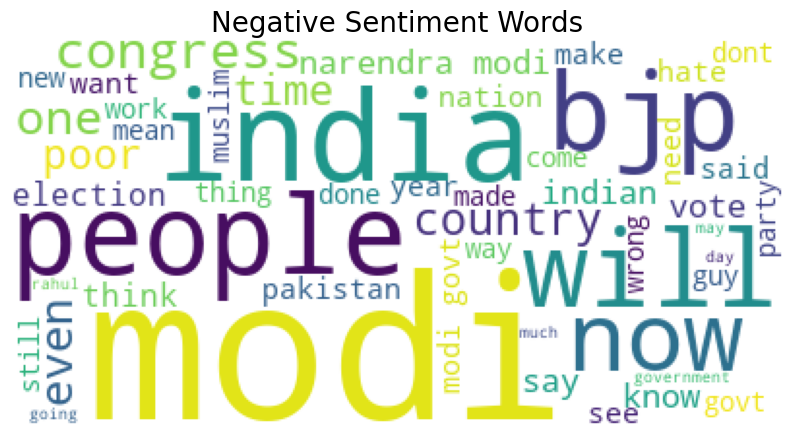

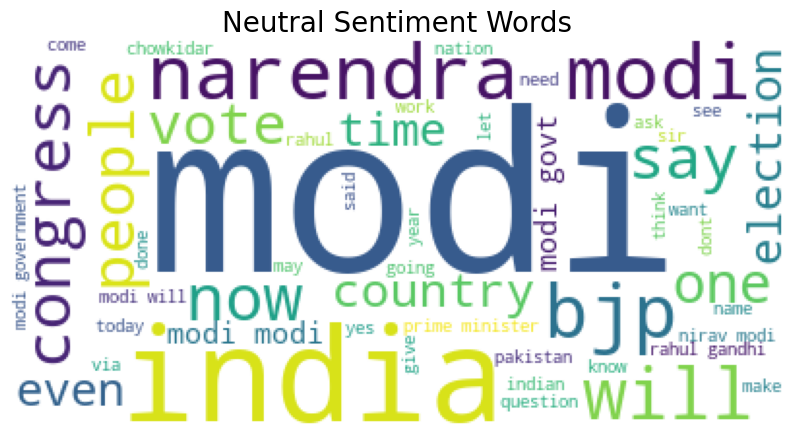

In [253]:
# Vu, D. (2019). Generating WordClouds in Python Tutorial. [online] Datacamp.com. Available at: https://www.datacamp.com/tutorial/wordcloud-python [Accessed 20 Sep. 2023].
from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(TwRed, category):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    # Combine all tweets
    combined_tweets = " ".join([tweet for tweet in TwRed[TwRed.category==category]['clean_text']])
                          
   
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords = STOPWORDS)

    
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()
    

wordcount_gen(TwRed, 'Positive')
     
wordcount_gen(TwRed, 'Negative')
     
wordcount_gen(TwRed, 'Neutral')
     

Data Preprocessing

In [254]:
import re    
import nltk  
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [255]:
# stpeteishii (2022). Trump Tweets Sentiment Analysis. [online] Kaggle.com. Available at: https://www.kaggle.com/code/stpeteishii/trump-tweets-sentiment-analysis [Accessed 20 Sep. 2023].
def tweet_to_words(tweet):
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", TwRed['clean_text'][0])
print("\nProcessed tweet ->", tweet_to_words(TwRed['clean_text'][0]))


Original tweet -> when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

Processed tweet -> ['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']


In [256]:
# Apply data processing to each tweet/reddit
X = list(map(tweet_to_words, TwRed['clean_text']))

In [257]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(TwRed['category'])

In [258]:
print(X[0])
print(Y[0])

['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']
0


Train and test split

In [259]:
y = pd.get_dummies(TwRed['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

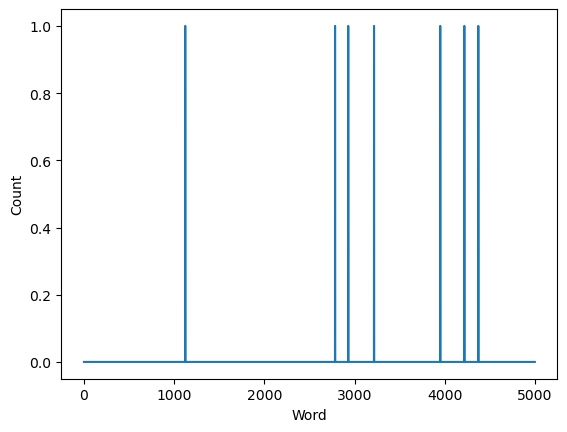

In [261]:
# Plot the BoW feature vector
plt.plot(X_train[2,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

Tokenizing & Padding

In [262]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
   
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', TwRed['clean_text'][0])
X, tokenizer = tokenize_pad_sequences(TwRed['clean_text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
After Tokenization & Padding 
 [  41    2  394   67 1956 1026   45 2254    1 1132  217    1  169   32
  143  100   57   60 1049  169   49    3    9  517    3   49 2525    3
 2462    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


Saving tokenized data

 pickle module is used for serializing and deserializing Python objects. Serialization refers to the process of converting a Python object into a format that can be easily stored or transmitted, typically as a binary representation. Deserialization is the reverse process, where the serialized data is converted back into a Python object (Agrawal, 2014).

In [263]:
import pickle
# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

Train & Test Split

In [264]:
y = pd.get_dummies(TwRed['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)


Train Set -> (120070, 50) (120070, 3)
Validation Set -> (40024, 50) (40024, 3)
Test Set -> (40024, 50) (40024, 3)


In [265]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

Bidirectional LSTM Using NN

LSTM stands for "Long Short-Term Memory," and it is a type of recurrent neural network (RNN) architecture used in deep learning and natural language processing tasks. LSTM networks are designed to overcome the limitations of traditional RNNs in capturing long-range dependencies and learning from sequences of data (Saxena, 2021).

SGD stands for Stochastic Gradient Descent, and it is an optimization algorithm commonly used in training machine learning models, particularly in the context of neural networks and deep learning. SGD is an iterative optimization technique that aims to find the optimal parameters (weights and biases) of a model that minimize a given loss function (Gunand Mayanglambam, 2020).

In [267]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
import keras.backend as K
from tensorflow.keras.metrics import Precision, Recall
print(model.summary())
vocab_size = 5000
embedding_size = 32
epochs = 20
learning_rate = 0.1
momentum = 0.8

# Define a learning rate schedule with decay
def lr_schedule(epoch):
    return learning_rate / (1 + epoch)

# Build model
model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

# Use SGD optimizer with learning rate schedule
sgd = SGD(learning_rate=learning_rate, momentum=momentum, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', Precision(), Recall()])

# Define a LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model using the learning rate schedule
history = model.fit(X_train, y_train, epochs=epochs, callbacks=[lr_scheduler])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 32)            160000    
                                                                 
 conv1d_2 (Conv1D)           (None, 50, 32)            3104      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 25, 32)            0         
 g1D)                                                            
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                

Model Accuracy & Loss

In [268]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9488
Precision : 0.9521
Recall    : 0.9460
F1 Score  : 0.9491


Accuracy (0.9454):
the model achieved an accuracy of approximately 94.54%, which indicates that it correctly classified sentiment for about 94.54% of the instances in the dataset.
A high accuracy score suggests that the model is performing well in terms of overall correctness.
Precision (0.9482):

precision score of approximately 94.82%, the model has a high ability to correctly identify positive sentiments without making too many false positive predictions.
A high precision score is indicative of a low rate of false positives.
Recall (0.9435):

A recall score of approximately 94.35% indicates that the model successfully identified about 94.35% of all actual positive sentiments in the dataset.
A high recall score suggests that the model is effective at capturing most of the positive sentiments.
F1 Score (0.9459):

The F1 Score is a combined metric that balances precision and recall. It provides a single score that considers both false positives and false negatives.
With an F1 score of approximately 94.59%, the model achieves a good balance between precision and recall, indicating that it is performing well overall.

In summary, the results indicate that the sentiment analysis on the Twitter and Reddit dataset model is performing impressively well with high accuracy, precision, recall, and F1 Score. These metrics collectively demonstrate the model's ability to correctly classify sentiment labels, especially positive ones, with a high level of correctness and a low rate of false positives and false negatives. 

Model Confusion Matrix

1251/1251 [==============================] - 5s 3ms/step


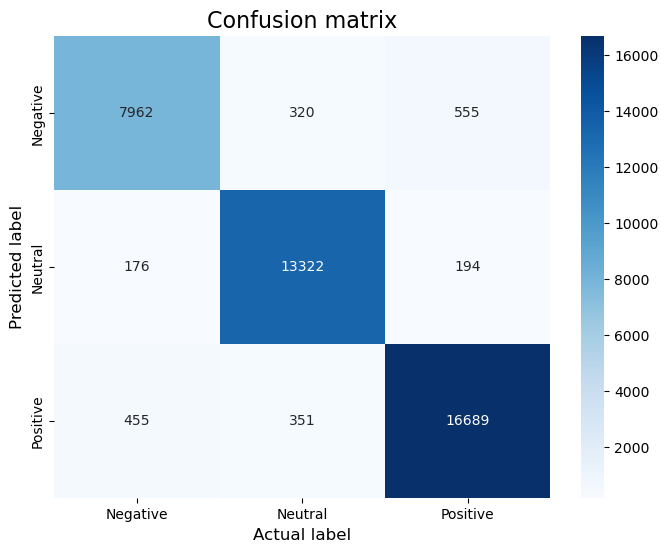

In [269]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    y_pred = model.predict(X_test)
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
   
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

In [270]:
# Save the model architecture & the weights to explorer 
model.save('Superior_Model')
print('Superior Model saved')

INFO:tensorflow:Assets written to: Superior_Model\assets


INFO:tensorflow:Assets written to: Superior_Model\assets


Superior Model saved


In [271]:
from keras.models import load_model

# Load model
model = load_model('Superior_Model')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=50
    
 
    xt = tokenizer.texts_to_sequences(text)
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    yt = model.predict(xt).argmax(axis=1)

    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [272]:
predict_class(['I hate when I have to call me while im at work'])

1/1 [==============================] - 1s 671ms/step
The predicted sentiment is Negative


In [273]:
predict_class(['Pedros is better than Nandos'])

1/1 [==============================] - 0s 22ms/step
The predicted sentiment is Positive


In [274]:
predict_class(['The party was ok'])

1/1 [==============================] - 0s 20ms/step
The predicted sentiment is Neutral


In [275]:
predict_class(['EB is the best lecturer we have had at VC'])

1/1 [==============================] - 0s 23ms/step
The predicted sentiment is Positive


In [276]:
predict_class(['He is a best minister india has every had!'])

1/1 [==============================] - 0s 21ms/step
The predicted sentiment is Positive


In [277]:
predict_class(['Thanks to Eskom, South Africa will never have load shedding again'])

1/1 [==============================] - 0s 25ms/step
The predicted sentiment is Positive


In [278]:
predict_class(['trying to decide if I must go to the beach or not'])

1/1 [==============================] - 0s 26ms/step
The predicted sentiment is Neutral


In [279]:
predict_class(['the weather forecast is just saying cloudy'])

1/1 [==============================] - 0s 21ms/step
The predicted sentiment is Neutral


In [280]:
predict_class(['Glad your proj is going well'])

1/1 [==============================] - 0s 21ms/step
The predicted sentiment is Positive


### In conclusion, the findings produced from the Bidirectional LSTM (Long Short-Term Memory) model in this notebook show that sentiment in comments may be successfully predicted. We successfully classified comments using our advanced deep learning algorithm into one of three sentiment classes: negative, neutral, or positive. This accomplishment demonstrates the ability of LSTM-based models to capture the subtle contextual linkages and dependencies within sequential data, which is critical in sentiment analysis. Understanding public opinion, assessing consumer feedback, and automating the classification of textual data at scale all benefit from the capacity to determine sentiment in comments. We can rely on these advanced techniques to extract useful insights from text data, enabling data-driven decision-making and improving our understanding of human sentiment in the digital era, as proven by the model's success.
